### Prediction of Wine type using Deep Learning.
The dataset consists of 12 variables. Here are a few of them:

1. `Fixed Acidity:` This refers to the non-volatile acids in the wine, which contribute to the wine's tartness.
2. `Volatile Acidity:` This refers to acetic acid content which can contribute to a vinegar-like taste in wine.
3. `Citric Acid:` Citric acid is one of the fixed acids in wine.
4. `Residual Sugar:` This is the sugar that remains after fermentation stops.
5. `Chlorides:` Chlorides can contribute to saltiness in wine.
6. `Free Sulfur Dioxide:` This is the sulfur dioxide that is added to wine.
7. `Total Sulfur Dioxide:` This is the sum of bound and free sulfur dioxide.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# import keras and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import train_test split and evaluation metrics.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# read red and white wine data from URL.
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Add value 1 to red type variable and 0 to white type variable.
red_wine['type'] = 1
white_wine['type'] = 0

# Concatenate red and white wine data.
wine = pd.concat([red_wine, white_wine], axis=0)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


<ipython-input-4-987709572>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

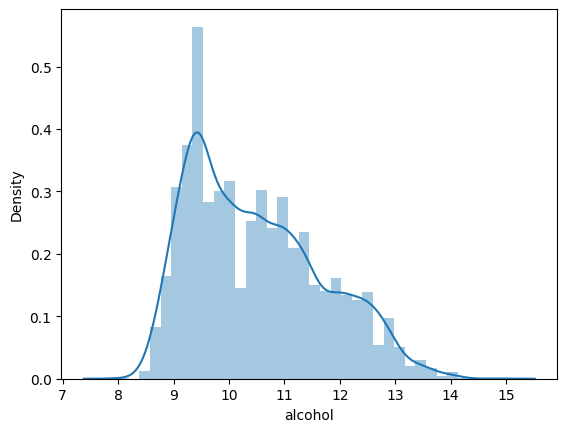

In [ ]:
# Plot distribution of Alcohol.
sns.distplot(wine['alcohol'])

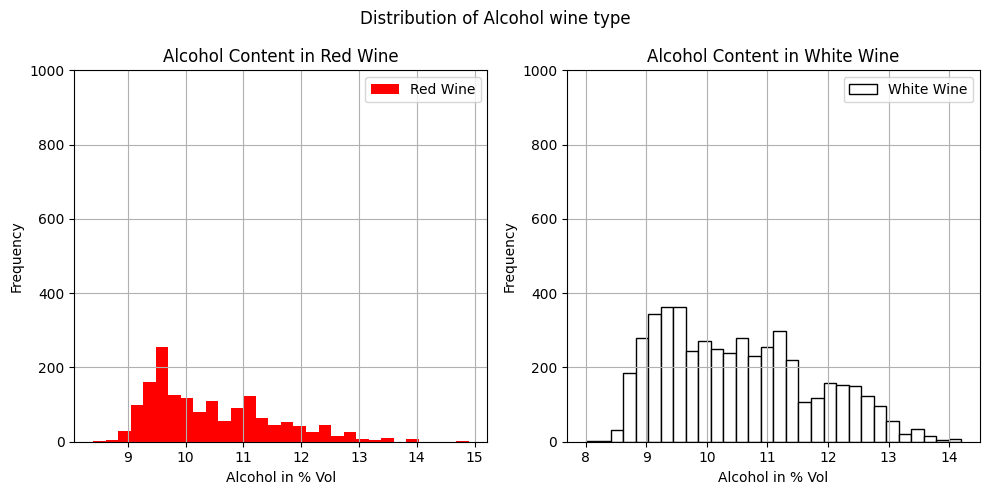

In [ ]:
# Create a histogram for each wine type (red and white) with the specified number or bins.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
wine[wine['type'] == 1]['alcohol'].hist(bins=30, ax=ax[0],facecolor = 'red',label = 'Red Wine')
wine[wine['type'] == 0]['alcohol'].hist(bins=30, ax=ax[1], facecolor = 'white', edgecolor = 'black', label = 'White Wine', lw = 0.5)

for a in ax:
    a.set_ylim([0,1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')
    a.legend()

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol wine type')
plt.tight_layout()
plt.show()



In [ ]:
# Splitting the datasets into training and testing datasets.
X = wine.drop('type', axis=1)
y = wine['type']

In [ ]:
# check X and y size.
print(X.shape)
print(y.shape)

(6497, 12)
(6497,)


In [ ]:
# Split the data into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a neural network model.
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model and add magicline command to track time.
%time
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


In [ ]:
# fit the model with 3 epochs and batch size as 1.
%time
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 11 µs
Epoch 1/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9194 - loss: 0.2421
Epoch 2/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9476 - loss: 0.1593
Epoch 3/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9498 - loss: 0.1410


In [ ]:
# Make predictions on new test data.
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

for prediction in y_pred_labels[:12]:
  wine_type = 'Red Wine' if prediction[0] == 1 else 'White Wine'
  print(f'The wine is {wine_type}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
The wine is White Wine
The wine is White Wine
The wine is White Wine
The wine is White Wine
The wine is White Wine
The wine is Red Wine
The wine is White Wine
The wine is White Wine
The wine is White Wine
The wine is White Wine
The wine is White Wine
The wine is White Wine


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       959
           1       0.95      0.86      0.90       341

    accuracy                           0.95      1300
   macro avg       0.95      0.92      0.94      1300
weighted avg       0.95      0.95      0.95      1300



In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9515


In [ ]:
# fit the model with 3 epochs and batch size as 1.
%time
# Store the training history
history = model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs
Epoch 1/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9600 - loss: 0.1120
Epoch 2/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9644 - loss: 0.1028
Epoch 3/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9617 - loss: 0.1037


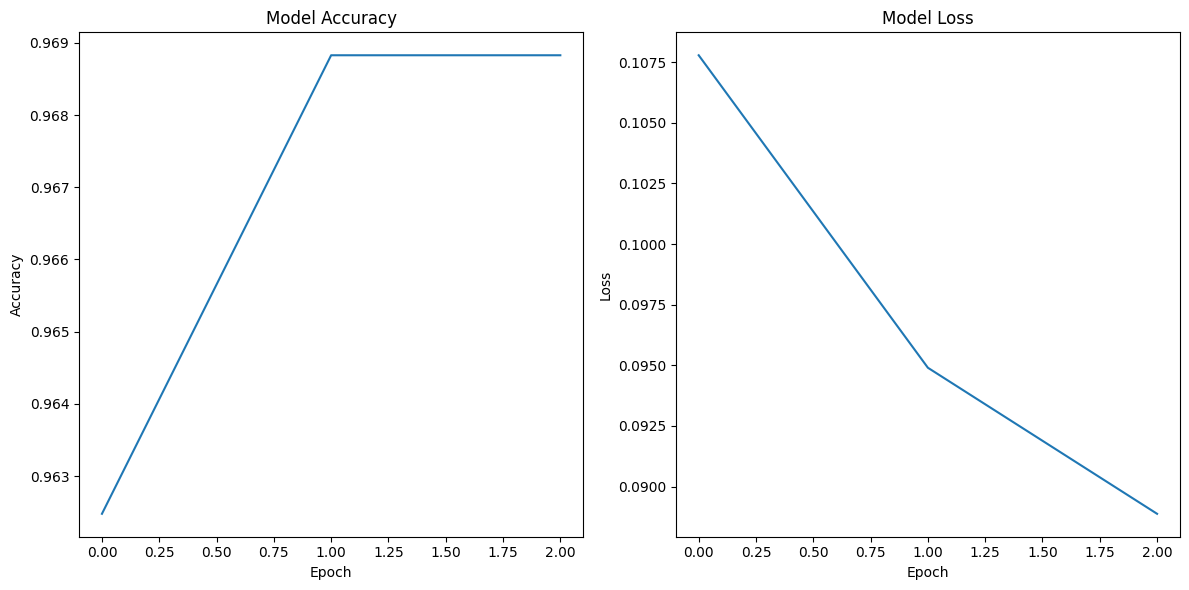

In [ ]:
# Plot Training and Validation Loss/Accuracy
plt.figure(figsize=(12, 6))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# If you had validation data, you would plot history.history['val_accuracy']
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left') # Adjust legend if validation data is used

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# If you had validation data, you would plot history.history['val_loss']
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left') # Adjust legend if validation data is used

plt.tight_layout()
plt.show()

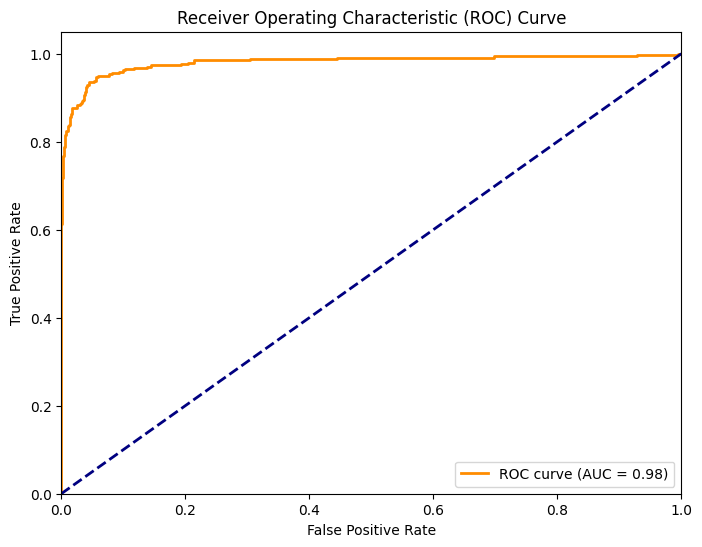

In [ ]:

# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()